### ■ 예제156. 탐욕 알고리즘
#### 탐욕 알고리즘은 매 순간마다 최선의 선택을 하는 것. 선택할 때마다 가장 좋다고 생각되는 것을 선택해 나가며 최종적인 해답을 구하는 알고리즘. 
#### 이 알고리즘을 설계할 때 주의할 점은 전체를 고려하는게 아니라 문제를 부분적으로 나누어 나누어진 문제에 대한 최적의 해답을 구하게끔 해야한다는 것.

##### 예시
    14원의 잔돈을 줘야하는데 잔돈의 종류가 10, 7, 1원이 있으면 잔돈을 가장 빨리 줄 수 있는 방법 -> 7원 2개
    탐욕 알고리즘은 10원 동전1개 1원 동전 4개

### ※ (오늘의 마지막 문제) 잔돈을 가장 빨리 나눠주는 방법으로 코드를 구현
    잔돈을 입력하세요 : 14
    10원 동전 0개, 7원 동전 2개, 1원 동전 0개로 줍니다

In [42]:
def change(n):
    coin=sorted(list(map(int, input('거스름돈으로 사용할 동전 종류: ').split())),reverse=True)
    change=[0]*len(coin)
    remain=[]
    rs=[]
    cnt=[]
    for i in range(len(coin)):
        change[i]=n//coin[i] # 처음 나눈 몫 (개수)
        remain.append(n%coin[i]) # 처음 나눈 나머지
    for k in range(len(coin)):
        temp=[]
        for j in range(len(coin)):
            temp.append(remain[k]//coin[j])
        rs.append(temp) # 나머지를 다시 나눈 몫 (개수)
    for l in range(len(rs)):
        cnt.append(change[l]+sum(rs[l]))
    if remain[cnt.index(min(cnt))] != 0:
        print(f'{coin[cnt.index(min(cnt))]}원 {change[cnt.index(min(cnt))]+rs[cnt.index(min(cnt))][cnt.index(min(cnt))]}개 {coin[-1]}원,{remain[cnt.index(min(cnt))]}개')
    elif remain[cnt.index(min(cnt))] == 0:
        print(f'{coin[cnt.index(min(cnt))]}원 {change[cnt.index(min(cnt))]+rs[cnt.index(min(cnt))][cnt.index(min(cnt))]}개')
            
change(38)

거스름돈으로 사용할 동전 종류: 10 7 1
7원 5개 1원,3개


In [60]:
coin=[10,7,1]
change=[0]*len(coin)
remain=[]
rs=[]
rs_rm=[]
cnt=[]
for i in range(len(coin)):
    change[i]=24//coin[i] # 처음 나눈 몫 (개수)
    remain.append(24%coin[i]) # 처음 나눈 나머지
for k in range(len(coin)):
    temp=[]
    temp_r=[]
    for j in range(len(coin)):
        temp.append(remain[k]//coin[j])
        temp_r.append(remain[k]%coin[j])
#     for l in range(len(rs)):
#         if temp_r[l] != 0:
#             print(temp_r[l])
#             temp[l]=temp[l] + temp_r[l]//coin[l]
#             temp_r[l]=temp_r[l] + temp_r[l]//coin[l]
    rs.append(temp) # 나머지를 다시 나눈 몫 (개수)
    rs_rm.append(temp_r)
# print(rs)
# print(rs_rm)
for l in range(len(rs)):
    cnt.append(change[l]+sum(rs[l]))
if remain[cnt.index(min(cnt))] != 0:
    print(f'{coin[cnt.index(min(cnt))]}원 {change[cnt.index(min(cnt))]+rs[cnt.index(min(cnt))][cnt.index(min(cnt))]}개, {coin[-1]}원 {remain[cnt.index(min(cnt))]}개')
elif remain[cnt.index(min(cnt))] == 0:
    print(f'{coin[cnt.index(min(cnt))]}원 {change[cnt.index(min(cnt))]+rs[cnt.index(min(cnt))][cnt.index(min(cnt))]}개')

# coin, change, remain, rs

10원 2개, 1원 4개


### ※ (점심시간 문제) 동전던지기  도박사의 주장을 반론하기 위한  함수를 생성하는데 함수에  인자값을 아래와 같이 3개로 해서 생성하시오~ 

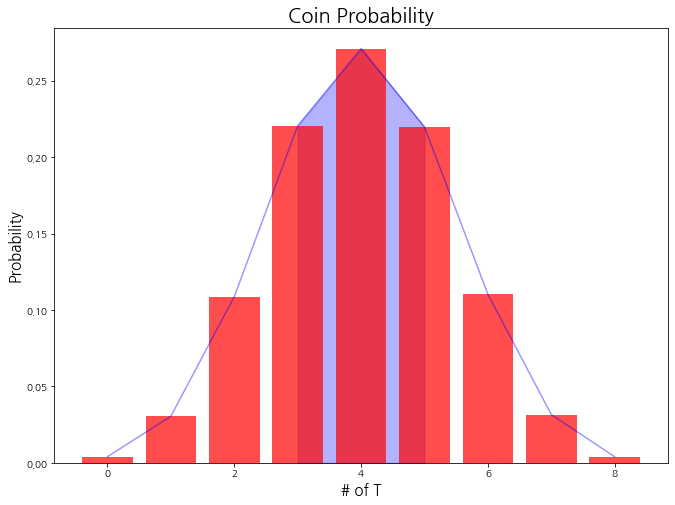

동전을 8 번 던졌을 때 뒷면이 나오는 횟수가 7 번 나올 확률은 신뢰구간 68% 안에 없습니다.


In [10]:
def coin_hypo(coin, num, brief=68) : 

    import random
    import numpy as np
    import math
    from scipy.stats import norm
    import matplotlib.pyplot as plt

    x = [i for i in range(coin +1)]
    y = [0 for i in range(len(x))]

    for i in range(100000):
        sum=0
        for j in range(coin):
            sum+=random.randint(0,1)
        y[sum]+=1

    for i in range(coin+1):
        y[i]/=100000

    m = []
    for k in range(len(x)) :
        m.append( x[k] * y[k] )
    mu = np.sum(m)
    mu
    var = []
    for k in range(len(x)) :
        var.append(((x[k] - mu)**2)*y[k])
    var_s = np.sum(var)
    sd = math.sqrt(var_s)
    
    if brief == 68:
        z=1.02
    elif brief == 95:
        z=1.96
    elif brief == 99:
        z=2.58
    
    x_1 = mu - z * sd
    x_2 = mu + z * sd

    plt.rcParams["figure.figsize"] = (11, 8)
    plt.bar(x, y,  align='center', color='red', alpha = 0.7)  # 막대그래프 시각화
    plt.fill_between(x , y,  where = (x_1 < x) & (x < x_2) , color = 'blue', alpha = 0.3)
    plt.plot(x, y, color = 'blue', alpha = 0.4)
    plt.xlabel('# of T', fontsize = 15) # x축 이름
    plt.ylabel('Probability', fontsize = 15) # y축 이름
    plt.title('Coin Probability', fontsize = 20)  # 그래프 제목
    plt.show()
    if x_1 <= num <=  x_2 :
        return f'동전을 {coin} 번 던졌을 때 뒷면이 나오는 횟수가 {num} 번 나올 확률은 신뢰구간 {brief}% 안에 있습니다.'
    else :
        return f'동전을 {coin} 번 던졌을 때 뒷면이 나오는 횟수가 {num} 번 나올 확률은 신뢰구간 {brief}% 안에 없습니다.'

print(coin_hypo(coin = 8, num = 7))

### ※ 이미지 스크롤링

In [7]:
import urllib.request
from bs4 import BeautifulSoup
from selenium import webdriver  # 웹 애플리케이션의 테스트를 자동화하기 위한 프레임 워크
from selenium.webdriver.common.keys import Keys
import time                     # 중간중간 sleep 을 걸어야 해서 time 모듈 import

# 웹브라우져로 크롬을 사용할거라서 크롬 드라이버를 다운받아 위의 위치에 둔다
# 팬텀 js로 하면 백그라운드로 실행할 수 있음
binary = 'D:/chromedriver/chromedriver.exe'

# 브라우져를 인스턴스화
browser = webdriver.Chrome(binary)

# 구글의 이미지 검색 url 받아옴(아무것도 안 쳤을때의 url)
browser.get(
    "https://www.google.co.kr/imghp?hl=ko&tab=wi&ogbl")

# 구글의 이미지 검색에 해당하는 input 창의 id 가 '  ?  ' 임(검색창에 해당하는 html코드를 찾아서 elem 사용하도록 설정)
# input창 찾는 방법은 원노트에 있음

#elem = browser.find_elements_by_class_name('gLFyf gsfi')

elem = browser.find_element_by_xpath("//*[@id='sbtc']/div/div[2]/input")

########################### 검색어 입력 ###########################

# elem 이 input 창과 연결되어 스스로 햄버거를 검색
elem.send_keys("nightview")

# 웹에서의 submit 은 엔터의 역할을 함
elem.submit()

########################### 반복할 횟수 ###########################

# 스크롤을 내리려면 브라우져 이미지 검색결과 부분(바디부분)에 마우스 클릭 한번 하고 End키를 눌러야함
for i in range(1, 5):
    browser.find_element_by_xpath("//body").send_keys(Keys.END)
    time.sleep(15)                  # END 키 누르고 내려가는데 시간이 걸려서 sleep 해줌

time.sleep(10)                      # 네트워크 느릴까봐 안정성 위해 sleep 해줌
html = browser.page_source         # 크롬브라우져에서 현재 불러온 소스 가져옴
soup = BeautifulSoup(html, "lxml")  # html 코드를 검색할 수 있도록 설정


########################### 그림파일 저장 ###########################

def fetch_list_url():
    params = []
    # 구글 이미지 url 이 있는 img 태그의 _img 클래스에 가서
    imgList = soup.find_all("img", class_="rg_i")
    for im in imgList:
        try:
            # params 리스트에 image url 을 담음
            params.append(im["src"])
        except KeyError:
            params.append(im["data-src"])
    return params

# 이미지의 상세 url 의 값이 있는 src 가 없을 경우
# data-src 로 가져오시오 ~


def fetch_detail_url():
    params = fetch_list_url()

    for idx, p in enumerate(params, 1):
        # 다운받을 폴더경로 입력
        urllib.request.urlretrieve(p, "d:/nightview/" + str(idx) + ".jpg")

# enumerate 는 리스트의 모든 요소를 인덱스와 쌍으로 추출
# 하는 함수 . 숫자 1은 인덱스를 1부터 시작해라 ~


fetch_detail_url()

# 끝나면 브라우져 닫기
browser.quit()